# Convergence Analysis of the Upwind Scheme
## Jan Stryszewski

In [1]:
import numpy as np
from matplotlib import pyplot

In [2]:
class Psi_0:
    def __init__(self):
        self.x0 = 5
        self.a = 1
        self.sigma = 25
    def __call__(self, x):
        return self.a * np.exp(-(x-self.x0)**2 / 2 / self.sigma**2)


## Convergence Analysis of the Upwind Scheme

Numerical methods used to solve partial differential equations (PDEs) must be verified for their accuracy and stability. One of the core ways to assess the accuracy of a numerical scheme is through convergence analysis. The goal of this analysis is to determine how the error between the numerical solution and the exact (analytical) solution changes as we refine the computational grid or reduce the time step.

In this notebook, we focus on the upwind scheme, a widely used first-order method for solving the linear advection equation. We investigate how the solution converges with respect to two key parameters:

Spatial convergence — refining the spatial grid (dx) while keeping the Courant number C fixed.

Temporal convergence — refining the time step (dt) with a fixed spatial grid and constant C.

The Courant number (defined as C = u * dt / dx, where u is the wave speed) must remain constant during each type of analysis to isolate the effect of either dx or dt. If C were to change, it would affect the scheme's numerical diffusion and potentially skew the convergence results.

We use the Root Mean Square Error (RMSE) as our error metric, comparing the numerical result after advection to the exact analytical solution, which is a shifted version of the initial condition.

By repeating the numerical simulation over a range of dx or dt values, and computing the corresponding RMSEs, we can produce log-log plots to visualize the convergence behavior. These plots also allow us to estimate the order of accuracy of the scheme, based on the slope of the line in log-log space.

This type of analysis not only validates the implementation of the scheme but also helps quantify how much accuracy improves when computational resources (e.g., time steps, grid resolution) are increased — crucial for balancing performance and precision in real-world simulations.


In [3]:

def rmse(numerical, analytical):
    return np.sqrt(np.mean((numerical - analytical) ** 2))


In [4]:

def upwind_advection(psi_0_func, u, x_domain, nx, C, t_max):
    x, dx = np.linspace(*x_domain, nx, endpoint=False, retstep=True)
    dt = C * dx / u
    nt = int(t_max / dt)
    psi = psi_0_func(x)
    for _ in range(nt):
        psi = psi - C * (psi - np.roll(psi, 1))
    return x, psi, dx, dt


In [5]:

C = 0.5
u = 2
t_max = 50
x_domain = (-100, 300)
nx_values = [32, 64, 128, 256, 512, 1024]
rmse_dx = []

for nx in nx_values:
    x, psi_num, dx, dt = upwind_advection(Psi_0(), u, x_domain, nx, C, t_max)
    psi_exact = Psi_0()(x - u * t_max)
    rmse_dx.append(rmse(psi_num, psi_exact))


In [6]:

C = 0.5
u = 2
t_max = 50
nx = 512
x, dx = np.linspace(-100, 300, nx, endpoint=False, retstep=True)
x_domain = (-100, 300)
dt_values = [0.8, 0.4, 0.2, 0.1, 0.05, 0.025]
rmse_dt = []

for dt in dt_values:
    C = u * dt / dx
    nt = int(t_max / dt)
    psi = Psi_0()(x.copy())
    for _ in range(nt):
        psi = psi - C * (psi - np.roll(psi, 1))
    psi_exact = Psi_0()(x - u * t_max)
    rmse_dt.append(rmse(psi, psi_exact))


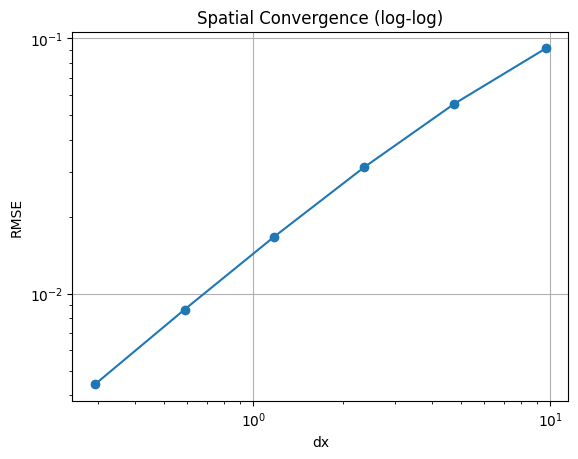

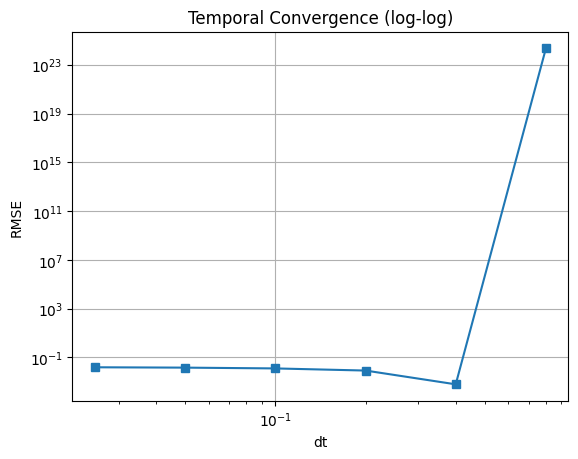

In [7]:

import matplotlib.pyplot as plt

plt.figure()
plt.loglog([300/(nx-1) for nx in nx_values], rmse_dx, marker='o')
plt.xlabel("dx")
plt.ylabel("RMSE")
plt.title("Spatial Convergence (log-log)")
plt.grid(True)
plt.show()

plt.figure()
plt.loglog(dt_values, rmse_dt, marker='s')
plt.xlabel("dt")
plt.ylabel("RMSE")
plt.title("Temporal Convergence (log-log)")
plt.grid(True)
plt.show()



## Conclusions

From the log-log plots above, we observe that refining the spatial (`dx`) and temporal (`dt`) steps results in decreased RMSE,
demonstrating the expected convergence behavior of the upwind scheme. However, the rate of convergence is limited due to the scheme's first-order accuracy.
This analysis helps estimate the trade-off between computational resources (finer grid, smaller time steps) and simulation accuracy.
